In [1]:
import pandas as pd

In [5]:
# Direct link to download from Google Drive
url = "https://drive.google.com/uc?export=download&id=15Nm6w4guCwXsav8TDuZR_Ss5CZy-mae7"

# Reading CSV
fashion_data = pd.read_csv(url)
fashion_data.head()

,user_uuid,category,designer_id,language,level,country,purchase_date,platform,item_id,stars,subscription_date
0,183,belt,120,en,cheap,uk,13-7-2022,android,3521,1,20-8-2021
1,134,underwear,102,it,cheap,it,2-5-2023,android,6239,2,20-11-2022
2,158,belt,106,it,cheap,it,6-8-2021,pc,3618,3,18-3-2020
3,82,shoes,102,it,premium,it,18-7-2023,android,5281,4,21-1-2022
4,201,shoes,113,en,average,uk,7-5-2023,android,5260,1,25-11-2022


In [7]:
fashion_data.duplicated().sum() 

0

### EDA

In [10]:
fashion_data.describe()

,user_uuid,designer_id,item_id,stars
count,999.000000,999.000000,999.000000,999.000000
mean,126.206206,110.769770,4032.721722,3.013013
std,68.581911,6.623049,2266.843497,1.415216
min,1.000000,100.000000,26.000000,1.000000
25%,69.000000,105.000000,2248.000000,2.000000
50%,128.000000,111.000000,3662.000000,3.000000
75%,183.500000,116.000000,5972.500000,4.000000
max,245.000000,122.000000,11000.000000,5.000000


In [12]:
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_uuid          999 non-null    int64 
 1   category           999 non-null    object
 2   designer_id        999 non-null    int64 
 3   language           999 non-null    object
 4   level              999 non-null    object
 5   country            999 non-null    object
 6   purchase_date      999 non-null    object
 7   platform           999 non-null    object
 8   item_id            999 non-null    int64 
 9   stars              999 non-null    int64 
 10  subscription_date  999 non-null    object
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


`No null value`

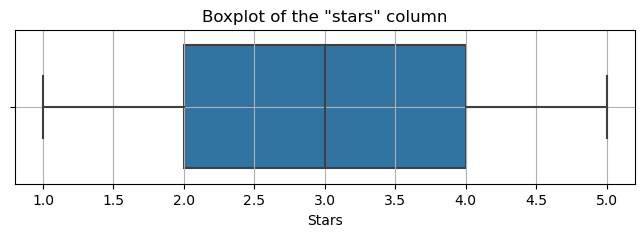

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot to display outliers and median
plt.figure(figsize=(8, 2))
sns.boxplot(x=fashion_data['stars'])
plt.title('Boxplot of the "stars" column')
plt.xlabel('Stars')
plt.grid(True)
plt.show()

`There are no outliers`

In [15]:
"""Conversion of date columns into datetime format and transformation of some columns into strings
purchase_date' and “subscription_date” are converted from strings to datetime with day-month-year format,
using ‘coerce’ to handle invalid values such as NaT
user_uuid', “designer_id” and “item_id” are converted to strings to ensure data type consistency"""

fashion_data['purchase_date'] = pd.to_datetime(fashion_data['purchase_date'], format='%d-%m-%Y', errors='coerce')
fashion_data['subscription_date'] = pd.to_datetime(fashion_data['subscription_date'], format='%d-%m-%Y', errors='coerce')
fashion_data['user_uuid'] = fashion_data['user_uuid'].astype(str)
fashion_data['designer_id'] = fashion_data['designer_id'].astype(str)
fashion_data['item_id'] = fashion_data['item_id'].astype(str)

In [16]:
# Contingency table between language and country
cross_tab = pd.crosstab(fashion_data['language'], fashion_data['country'])

print(cross_tab)

country    fr   it   uk
language               
en          0    0  337
fr        211    0    0
it          0  451    0


The language column does not provide additional insight, as it perfectly correlates with the country column.  
Therefore **the language column can be excluded.**

In [21]:
fashion_data = fashion_data.drop(columns=['language'])

In [23]:
fashion_data['country'] = fashion_data['country'].replace({
    'uk': 'United Kingdom',
    'fr': 'France',
    'it': 'Italy'
})

In [25]:
fashion_data.head()

,user_uuid,category,designer_id,level,country,purchase_date,platform,item_id,stars,subscription_date
0,183,belt,120,cheap,United Kingdom,2022-07-13,android,3521,1,2021-08-20
1,134,underwear,102,cheap,Italy,2023-05-02,android,6239,2,2022-11-20
2,158,belt,106,cheap,Italy,2021-08-06,pc,3618,3,2020-03-18
3,82,shoes,102,premium,Italy,2023-07-18,android,5281,4,2022-01-21
4,201,shoes,113,average,United Kingdom,2023-05-07,android,5260,1,2022-11-25


Following code: `Break down the column of purchase dates and subscription date`     
This helps to analyse seasonal and annual purchasing trends,
useful for marketing strategies, planning and identifying sales peaks.

In [28]:
def assign_trimester(month):
    """
    Assigns a quarter (T1-T4) based on the month.
    
    Parameters:
    month (int): Mese as integer (1-12)
    
    Returns:
    str: Trimester as 'T1', 'T2', 'T3' o 'T4'
    """
    if month in [1, 2, 3]:
        return 'T1'
    elif month in [4, 5, 6]:
        return 'T2'
    elif month in [7, 8, 9]:
        return 'T3'
    else:
        return 'T4'

# Extract year, quarter and month from purchase_date
fashion_data['purchase_year'] = fashion_data['purchase_date'].dt.year
fashion_data['purchase_trimester'] = fashion_data['purchase_date'].dt.month.apply(assign_trimester)
fashion_data['purchase_month'] = fashion_data['purchase_date'].dt.month

# Extract year, quarter and month from subscription_date
fashion_data['subscription_year'] = fashion_data['subscription_date'].dt.year
fashion_data['subscription_trimester'] = fashion_data['subscription_date'].dt.month.apply(assign_trimester)
fashion_data['subscription_month'] = fashion_data['subscription_date'].dt.month

In [30]:
fashion_data.head(10)

,user_uuid,category,designer_id,level,country,purchase_date,platform,item_id,stars,subscription_date,purchase_year,purchase_trimester,purchase_month,subscription_year,subscription_trimester,subscription_month
0,183,belt,120,cheap,United Kingdom,2022-07-13,android,3521,1,2021-08-20,2022,T3,7,2021,T3,8
1,134,underwear,102,cheap,Italy,2023-05-02,android,6239,2,2022-11-20,2023,T2,5,2022,T4,11
2,158,belt,106,cheap,Italy,2021-08-06,pc,3618,3,2020-03-18,2021,T3,8,2020,T1,3
3,82,shoes,102,premium,Italy,2023-07-18,android,5281,4,2022-01-21,2023,T3,7,2022,T1,1
4,201,shoes,113,average,United Kingdom,2023-05-07,android,5260,1,2022-11-25,2023,T2,5,2022,T4,11
5,191,dress,119,cheap,United Kingdom,2023-02-23,pc,7542,5,2021-05-15,2023,T1,2,2021,T2,5
6,181,belt,121,premium,United Kingdom,2022-11-05,apple,3237,2,2020-12-09,2022,T4,11,2020,T4,12
7,18,shoes,113,premium,Italy,2022-01-03,pc,5318,5,2021-12-14,2022,T1,1,2021,T4,12
8,15,bottom,119,cheap,France,2023-08-16,android,1294,4,2022-05-13,2023,T3,8,2022,T2,5
9,27,belt,121,premium,France,2023-07-08,apple,3370,3,2021-01-12,2023,T3,7,2021,T1,1


In [32]:
# Reorder columns: place year, trimester, and month right after their respective date columns
columns_order = [
    'user_uuid', 'category', 'designer_id', 'level', 'country', 
    'purchase_date', 'purchase_year', 'purchase_trimester', 'purchase_month', 
    'platform', 'item_id', 'stars', 
    'subscription_date', 'subscription_year', 'subscription_trimester', 'subscription_month'
]

# Apply the new column order to the dataframe
fashion_data = fashion_data[columns_order]

In [34]:
fashion_data.head()

,user_uuid,category,designer_id,level,country,purchase_date,purchase_year,purchase_trimester,purchase_month,platform,item_id,stars,subscription_date,subscription_year,subscription_trimester,subscription_month
0,183,belt,120,cheap,United Kingdom,2022-07-13,2022,T3,7,android,3521,1,2021-08-20,2021,T3,8
1,134,underwear,102,cheap,Italy,2023-05-02,2023,T2,5,android,6239,2,2022-11-20,2022,T4,11
2,158,belt,106,cheap,Italy,2021-08-06,2021,T3,8,pc,3618,3,2020-03-18,2020,T1,3
3,82,shoes,102,premium,Italy,2023-07-18,2023,T3,7,android,5281,4,2022-01-21,2022,T1,1
4,201,shoes,113,average,United Kingdom,2023-05-07,2023,T2,5,android,5260,1,2022-11-25,2022,T4,11


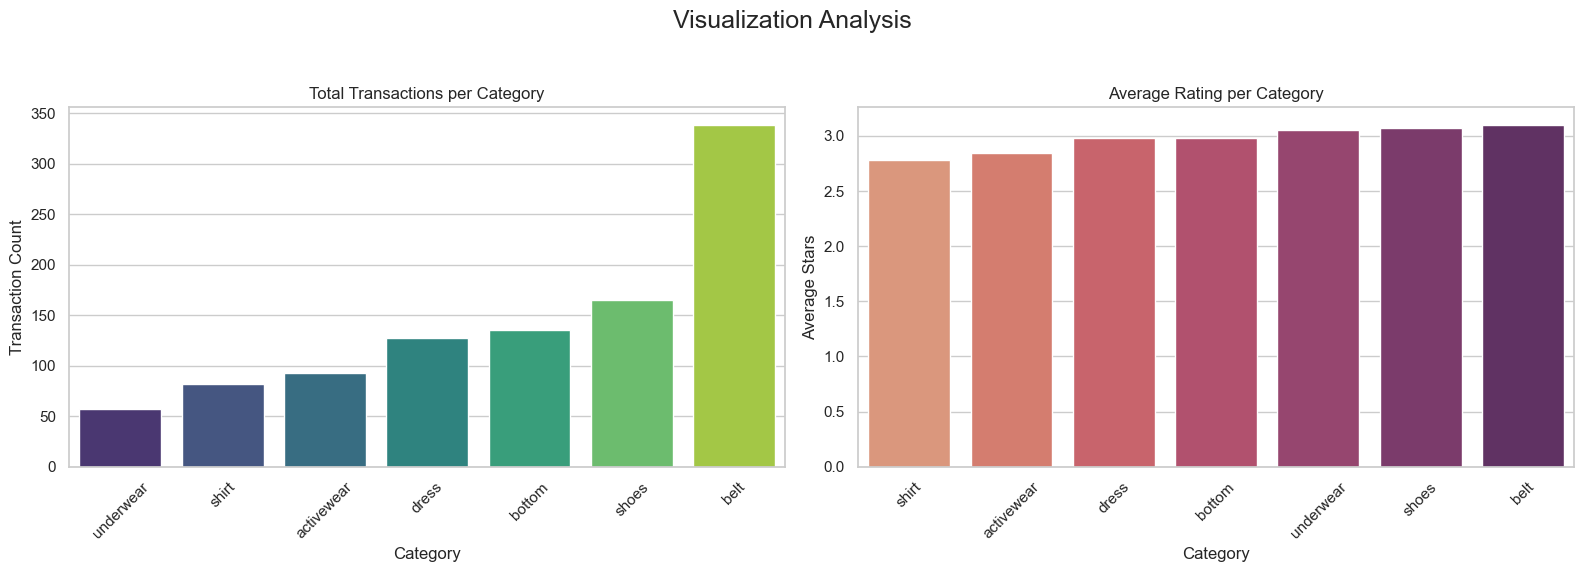

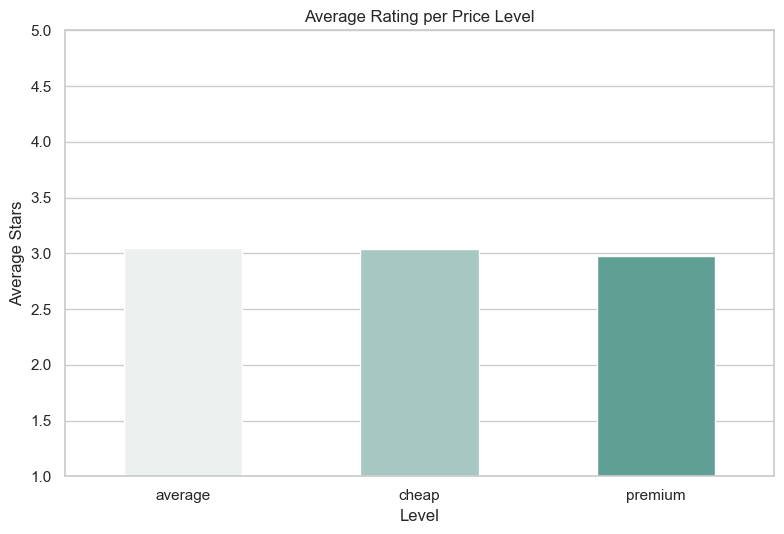

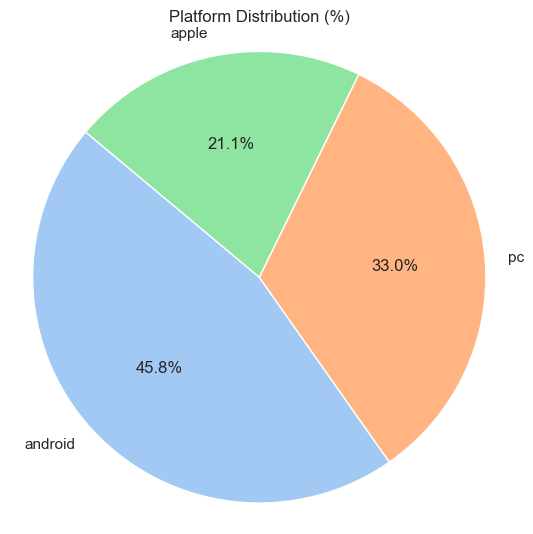

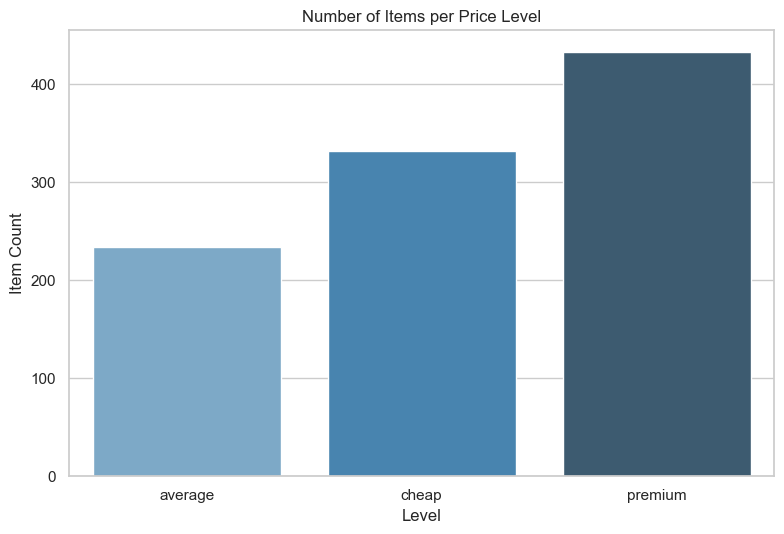

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
fig.suptitle('Visualization Analysis', fontsize=18)

# 1. Total number of transactions per category (barplot)
transactions_per_category = fashion_data['category'].value_counts().reset_index()
transactions_per_category.columns = ['category', 'transaction_count']
transactions_per_category = transactions_per_category.sort_values(by='transaction_count', ascending=True)

sns.barplot(data=transactions_per_category, x='category', y='transaction_count', palette='viridis', ax=axes[0])
axes[0].set_title('Total Transactions per Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Transaction Count')
axes[0].tick_params(axis='x', rotation=45)

# 2. Average rating (stars) per category (barplot)
avg_stars = fashion_data.groupby('category')['stars'].mean().reset_index()
avg_stars = avg_stars.sort_values(by='stars', ascending=True)

sns.barplot(data=avg_stars, x='category', y='stars', ax=axes[1], palette='flare')
axes[1].set_title('Average Rating per Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average Stars')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Average rating per price level (barplot)
plt.figure(figsize=(8, 5.5))
level_stars = fashion_data.groupby('level')['stars'].mean().reset_index()
sns.barplot(data=level_stars, x='level', y='stars', palette='light:#5A9', width=0.5)
plt.title('Average Rating per Price Level')
plt.xlabel('Level')
plt.ylabel('Average Stars')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()

# 4. Platform distribution (pie chart)
platform_counts = fashion_data['platform'].value_counts()
platform_labels = platform_counts.index
platform_sizes = platform_counts.values

plt.figure(figsize=(5.5, 5.5))
plt.pie(platform_sizes, labels=platform_labels, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('Platform Distribution (%)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 5. Number of items per price level (barplot)
plt.figure(figsize=(8, 5.5))
item_counts_per_level = fashion_data.groupby('level')['item_id'].count().reset_index().rename(columns={'item_id': 'item_count'})
sns.barplot(data=item_counts_per_level, x='level', y='item_count', palette='Blues_d')
plt.title('Number of Items per Price Level')
plt.xlabel('Level')
plt.ylabel('Item Count')
plt.tight_layout()
plt.show()

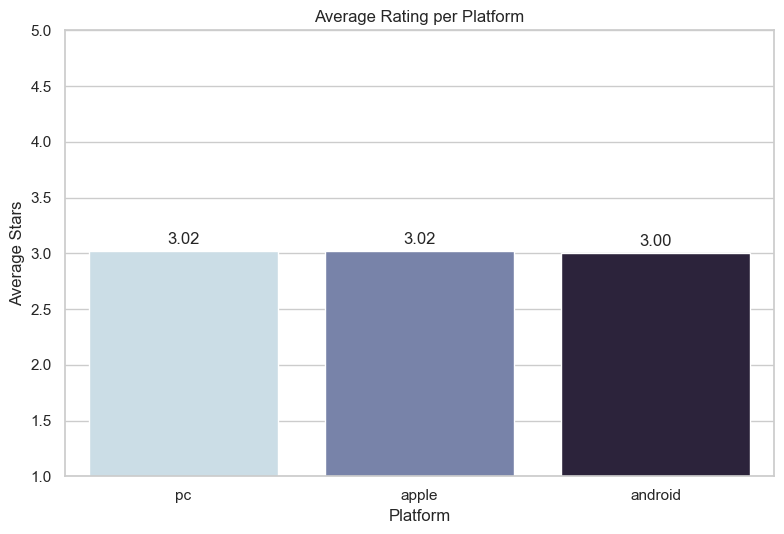

In [19]:
# Graphic settings
sns.set(style="whitegrid")

# calculation of average rating per platform
avg_rating_per_platform = fashion_data.groupby('platform')['stars'].mean().reset_index()
avg_rating_per_platform = avg_rating_per_platform.sort_values(by='stars', ascending=False)

# Visualisation with barplot
plt.figure(figsize=(8, 5.5))
ax = sns.barplot(data=avg_rating_per_platform, x='platform', y='stars', palette='ch:s=.25,rot=-.25')

# Adding labels above the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', padding=3)

plt.title('Average Rating per Platform')
plt.xlabel('Platform')
plt.ylabel('Average Stars')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()

In [45]:
fashion_data.to_csv('Fashion_data.csv', index=False)